# Correção do Single Eye

In [41]:
import glob

import tensorflow as tf
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import backend as K
K.clear_session()

from utils import create_folder, resize_one_img, load_images_array, load_images_array_return_shape

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true) # GT
    y_pred_f = K.flatten(y_pred) # Predicted
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (K.sum(y_true_f*y_true_f) + K.sum(y_pred_f*y_pred_f))

ORIGINAL_SIZE = 850 #Antigo Size Img
NEW_SIZE = 256 #Tamanho para qual as imagens serão convertidas, deixe igual ao original se não for alterar

working_folder = './TM46_40prod_Mauro_SingleEye/'
batch = [4, 8]
index = 0

print("Carregando novas imagens")
_folder = "./dados_girino/TM40"
new_imgs = sorted(glob.glob(_folder + '/Producao/*'))
X , img_shape = load_images_array_return_shape(new_imgs, ORIGINAL_SIZE, NEW_SIZE)

GT_Test = sorted(glob.glob(_folder + '/GT_Producao/*'))
Y = load_images_array(GT_Test, new_size = NEW_SIZE)

Carregando novas imagens


In [43]:
def cut_img(img, offset = 0):
    img = np.reshape(img, (img.shape[0],img.shape[1]))
    height, width = img.shape
    width_cutoff = width // 2
    s1 = img[:, :width_cutoff - offset]
    s2 = img[:, width_cutoff + offset:]
    return s1, s2

def cut_img_list(data, offset = 0):
    s1_list = []
    s2_list = []
    for i in range(len(data)):
        s1, s2 = cut_img(data[i], offset)
        s1_list.append(s1)
        s2_list.append(s2)
    
    return s1_list, s2_list

size_img = 256
offset = 48
s1, s2 = cut_img_list(X, offset)


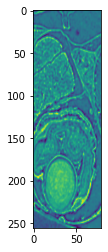

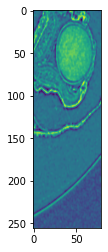

In [21]:
import matplotlib.pyplot as plt

a = s1[100]
b = s2[100]

plt.imshow(a)
plt.show()

plt.imshow(b)
plt.show()

In [22]:
import cv2

def resize_one_img(img, width, height):
    curr_img = cv2.resize(img, (width, height))
    return curr_img

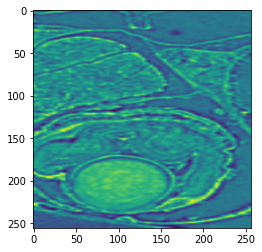

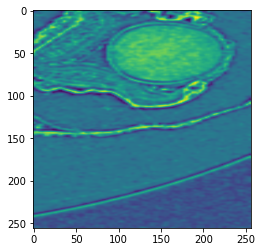

In [24]:
a1 = resize_one_img(a, size_img, size_img)
b1 = resize_one_img(b, size_img, size_img)

plt.imshow(a1)
plt.show()

plt.imshow(b1)
plt.show()

In [25]:
a.shape

(256, 80)

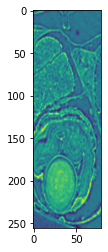

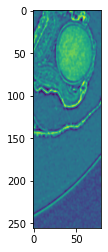

In [30]:
a2 = resize_one_img(a1, int(size_img/2 - offset), size_img)
b2 = resize_one_img(b1, int(size_img/2 - offset), size_img)

plt.imshow(a2)
plt.show()

plt.imshow(b2)
plt.show()

In [38]:
c = np.zeros((size_img, 2 * offset))

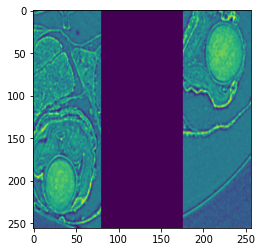

In [39]:
new_img = np.concatenate((a2, c, b2), axis = -1)

plt.imshow(new_img)
plt.show()

In [40]:
new_img.shape

(256, 256)

In [ ]:
def reshape_parts(conc):
    conc = np.asarray(conc)
    print(conc.shape)
    conc = np.reshape(conc, (conc.shape[0],conc.shape[1], conc.shape[2], 1))
    return conc

s1 = reshape_parts(s1)
s2 = reshape_parts(s2)

# Corrigindo GTs do TM40 e 46

In [50]:
import glob

import tensorflow as tf
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import backend as K
K.clear_session()

from utils import create_folder, resize_one_img, load_images_array, load_images_array_return_shape

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true) # GT
    y_pred_f = K.flatten(y_pred) # Predicted
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (K.sum(y_true_f*y_true_f) + K.sum(y_pred_f*y_pred_f))

ORIGINAL_SIZE = 850 #Antigo Size Img
NEW_SIZE = 256 #Tamanho para qual as imagens serão convertidas, deixe igual ao original se não for alterar

working_folder = './TM46_40prod_Mauro_SingleEye/'
batch = [4, 8]
index = 0

print("Carregando novas imagens")
_folder = "./dados_girino/TM40"
new_imgs = sorted(glob.glob(_folder + '/Producao/*'))
X , img_shape = load_images_array_return_shape(new_imgs, ORIGINAL_SIZE, NEW_SIZE)

GT_Test = sorted(glob.glob(_folder + '/GT_Producao/*'))
Y = load_images_array(GT_Test, new_size = NEW_SIZE)

def cut_img(img, offset = 0):
    img = np.reshape(img, (img.shape[0],img.shape[1]))
    height, width = img.shape
    width_cutoff = width // 2
    s1 = img[:, :width_cutoff - offset]
    s2 = img[:, width_cutoff + offset:]
    return s1, s2

def cut_img_list(data, offset = 0):
    s1_list = []
    s2_list = []
    for i in range(len(data)):
        s1, s2 = cut_img(data[i], offset)
        s1_list.append(s1)
        s2_list.append(s2)
    
    return s1_list, s2_list

size_img = 256
offset = 48

s1, s2 = cut_img_list(Y, offset)

Carregando novas imagens


In [62]:
# TM40
s1_ld, s1_lu, s2_ld, s2_lu = 0, 276, 110, 387
# TM46
#s1_ld, s1_lu, s2_ld, s2_lu = 0, 326, 89, 408

In [63]:
s1 = s1[s1_ld:s1_lu]
s2 = s2[s2_ld:s2_lu]

In [78]:
total_imgs = len(new_imgs)
print(total_imgs)

387


In [65]:
print(len(s1)) # 276
print(len(s2)) # 277

276
277


In [79]:
def rebuild_imgs(img, img_ld, img_lu, total_imgs, size_img = 256, offset = 48):
    ld_s1 = np.zeros((img_ld, size_img, int(size_img/2 - offset)))
    lu_s1 = np.zeros((total_imgs - img_lu, size_img, int(size_img/2 - offset)))

    new_img = np.concatenate((ld_s1, img, lu_s1), axis = 0)

    return new_img


In [80]:
vish = rebuild_imgs(s2, s2_ld, s2_lu, total_imgs)

print(vish.shape)

# Salvar GTs para confirmar

In [1]:
import glob

import tensorflow as tf
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import backend as K
K.clear_session()

from utils import create_folder, resize_one_img, load_images_array, load_images_array_return_shape

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true) # GT
    y_pred_f = K.flatten(y_pred) # Predicted
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (K.sum(y_true_f*y_true_f) + K.sum(y_pred_f*y_pred_f))

ORIGINAL_SIZE = 850 #Antigo Size Img
NEW_SIZE = 256 #Tamanho para qual as imagens serão convertidas, deixe igual ao original se não for alterar

working_folder = './TM46_40prod_Mauro_SingleEye/'
batch = [4, 8]
index = 0

print("Carregando novas imagens")
_folder = "./dados_girino/TM46"
new_imgs = sorted(glob.glob(_folder + '/Producao/*'))
X , img_shape = load_images_array_return_shape(new_imgs, ORIGINAL_SIZE, NEW_SIZE)

GT_Test = sorted(glob.glob(_folder + '/GT_Producao/*'))
Y = load_images_array(GT_Test, new_size = NEW_SIZE)

def cut_img(img, offset = 0):
    img = np.reshape(img, (img.shape[0],img.shape[1]))
    height, width = img.shape
    width_cutoff = width // 2
    s1 = img[:, :width_cutoff - offset]
    s2 = img[:, width_cutoff + offset:]
    return s1, s2

def cut_img_list(data, offset = 0):
    s1_list = []
    s2_list = []
    for i in range(len(data)):
        s1, s2 = cut_img(data[i], offset)
        s1_list.append(s1)
        s2_list.append(s2)
    
    return s1_list, s2_list

size_img = 256
offset = 48

s1, s2 = cut_img_list(Y, offset)

Using TensorFlow backend.


Carregando novas imagens


In [2]:
# TM40
#s1_ld, s1_lu, s2_ld, s2_lu = 0, 276, 110, 387
# TM46
s1_ld, s1_lu, s2_ld, s2_lu = 89, 408, 0, 326

In [3]:
s1 = s1[s1_ld:s1_lu]
s2 = s2[s2_ld:s2_lu]

In [4]:
def save_imgs(folder_name, imgs):
    for i in range(len(imgs)):
            io.imsave(folder_name + '/predicao_%s_%s.png'%(str(GT_Test[i][-7:-4]), str(batch[index])), resize_one_img(imgs[i], int(size_img/2 - offset), size_img))

In [ ]:
folder_name = './Outs/TM46'

save_imgs(folder_name + '/s1', s1)
save_imgs(folder_name + '/s2', s2)

Execução de Teste

In [2]:
import glob

import tensorflow as tf
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import backend as K
K.clear_session()

from utils import resize_img
from utils import create_folder, resize_one_img, load_images_array, load_images_array_return_shape

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true) # GT
    y_pred_f = K.flatten(y_pred) # Predicted
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (K.sum(y_true_f*y_true_f) + K.sum(y_pred_f*y_pred_f))

def cut_img(img, offset = 0):
    img = np.reshape(img, (img.shape[0],img.shape[1]))
    height, width = img.shape
    width_cutoff = width // 2
    s1 = img[:, :width_cutoff - offset]
    s2 = img[:, width_cutoff + offset:]
    return s1, s2

def cut_img_list(data, offset = 0):
    s1_list = []
    s2_list = []
    for i in range(len(data)):
        s1, s2 = cut_img(data[i], offset)
        s1_list.append(s1)
        s2_list.append(s2)
    
    return s1_list, s2_list

def reshape_parts(conc):
    conc = np.asarray(conc)
    #print(conc.shape)
    conc = np.reshape(conc, (conc.shape[0],conc.shape[1], conc.shape[2], 1))
    return conc

def rebuild_parts(img, img_ld, img_lu, total_imgs, size_img = 256, offset = 48):
    ld_s1 = np.zeros((img_ld, size_img, int(size_img/2 - offset)))
    lu_s1 = np.zeros((total_imgs - img_lu, size_img, int(size_img/2 - offset)))

    new_img = np.concatenate((ld_s1, img, lu_s1), axis = 0)

    return new_img

ORIGINAL_SIZE = 850 #Antigo Size Img
NEW_SIZE = 320 #Tamanho para qual as imagens serão convertidas, deixe igual ao original se não for alterar

working_folder = './TM46_40prod_Mauro_SingleEye/'
batch = [4, 8]
index = 0

print("Carregando novas imagens")
_folder = "./dados_girino/TM40"
new_imgs = sorted(glob.glob(_folder + '/Producao/*'))
X , img_shape = load_images_array_return_shape(new_imgs, ORIGINAL_SIZE, NEW_SIZE)

GT_Test = sorted(glob.glob(_folder + '/GT_Producao/*'))
Y = load_images_array(GT_Test, new_size = NEW_SIZE)

offset = 48
total_imgs = len(new_imgs)
s1, s2 = cut_img_list(X, offset)

# TM40
s1_ld, s1_lu, s2_ld, s2_lu = 0, 276, 110, 387
# TM46
#s1_ld, s1_lu, s2_ld, s2_lu = 0, 326, 89, 408

s1 = s1[s1_ld:s1_lu]
s2 = s2[s2_ld:s2_lu]

s1 = resize_img(s1, int(NEW_SIZE/2), NEW_SIZE)
s2 = resize_img(s2, int(NEW_SIZE/2), NEW_SIZE)

s1 = reshape_parts(s1)
s2 = reshape_parts(s2)

import time

n_exec = 1
n_fold = 10

Using TensorFlow backend.


Carregando novas imagens


In [3]:
i = 0

new_imgs_load = X
GT_Test_dice = Y

print("\n\n\nRealizando Execução: %i\n\n\n"%n_exec)
execution_name = 'Exec_%i'%n_exec
folder_name = working_folder + execution_name + '/'
filename = ['girino_4_100_%s'%execution_name.lower()]

model = keras.models.load_model(folder_name + '%s.h5'%(filename[index]), compile=False)




Realizando Execução: 1



Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
s1_pred = model.predict(s1)
print("Shape do S1 predito")
print(s1_pred.shape)

Shape do S1 predito
(276, 320, 160, 1)


In [5]:
s1_pred = resize_img(s1_pred, int(NEW_SIZE/2 - offset), NEW_SIZE)
print("Shape do S1 resized")
print(s1_pred.shape)

Shape do S1 resized
(276, 320, 112)


In [6]:
middle = np.zeros((total_imgs, NEW_SIZE, 2 * offset))
print("Shape do meio")
print(middle.shape)
s2_pred = model.predict(s2)
s2_pred = resize_img(s2_pred, int(NEW_SIZE/2 - offset), NEW_SIZE)
print("Shape do S1")
print(s1_pred.shape)

Shape do meio
(320, 96, 387)
Shape do S1
(276, 320, 112)


In [15]:
print(s1_pred.shape)

(387, 320, 112)


In [14]:
s1_pred = rebuild_parts(s1_pred, s1_ld, s1_lu, total_imgs)
s2_pred = rebuild_parts(s2_pred, s2_ld, s2_lu, total_imgs)

(0, 320, 112)
(111, 320, 112)
(110, 320, 112)
(0, 320, 112)


In [19]:
new_predicao = np.concatenate((s1_pred, middle, s2_pred), axis = -1)
print(new_predicao.shape)
new_predicao = new_predicao > 0.5
new_predicao = np.float64(new_predicao)

(387, 320, 320)


In [20]:
print("Predizendo " + str(len(new_predicao)) + " Imagens")
create_folder(folder_name + 'outputs_prod')
for i in range(len(new_predicao)):
    io.imsave(folder_name + 'outputs_prod/predicao_%s_%s.png'%(str(GT_Test[i][-7:-4]), str(batch[index])), resize_one_img(new_predicao[i], img_shape[1], img_shape[0]))
    #io.imsave(folder_name + 'outputs_prod/predicao_%s_%s.png'%((i), str(batch[index])), resize_one_img(new_predicao[i], img_shape[1], img_shape[0]))

print("Calculando o dice de produção")
dice_metric = []
sess = tf.InteractiveSession()
for i in range(len(new_predicao)):
    dice_metric.append(dice_coef(new_predicao[i], GT_Test_dice[i]).eval())
    print("Dice número", i, " = ", dice_metric[i])
sess.close()

print('Salvando valores de Dice...\nMédia dos Dices: ' + str(np.mean(dice_metric)))
with open(folder_name + 'outputs_prod/dice_metric_production_%s.txt'%(str(batch[index])), 'w') as file:
    file.write(str(dice_metric))

K.clear_session()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Predizendo 387 Imagens
Diretorio  ./TM46_40prod_Mauro_SingleEye/Exec_1/outputs_prod  ja existe


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Calculando o dice de produção
Dice número 0  =  0.024195235457321374
Dice número 1  =  0.055800075376165666
Dice número 2  =  0.08696338032882588
Dice número 3  =  0.11487875707928011
Dice número 4  =  0.12036412475294458
Dice número 5  =  0.15392749139802467
Dice número 6  =  0.1848329033686408
Dice número 7  =  0.2244533835901803
Dice número 8  =  0.23219818801321213
Dice número 9  =  0.2694374465842013
Dice número 10  =  0.2816978400542842
Dice número 11  =  0.27136323928033457
Dice número 12  =  0.2529714005173172
Dice número 13  =  0.2849313393717734
Dice número 14  =  0.2964045096906203
Dice número 15  =  0.29534430116401905
Dice número 16  =  0.2847679523196418
Dice número 17  =  0.30261463195436084
Dice número 18  =  0.3201447967375902
Dice número 19  =  0.32387866986062125
Dice número 20  =  0.34243565548722094
Dice número 21  =  0.35650300260902357
Dice número 22  =  0.36573839254606516
Dice número 23  =  0.3744202175434004
Dice número 24  =  0.382079216895033
Dice número 25 

Pegar os tempos em uma só array

In [16]:
working_folder = './TM40_46prod_Mauro_SingleEye/'

tempos = []

n_exec = 1
n_fold = 10

for i in range(n_fold):
    with open(working_folder + 'Exec_%i/tempos_4_100_exec_%i.txt'%(n_exec, n_exec), 'r') as f:
        text = f.read()
    print(text)
    a = text.split()
    tempos.append(round(float(a[-1][:-1]), 3))
    print("Tempo de execução: %.3f"%(tempos[-1]))
    n_exec += 1

with open(working_folder + 'Times.txt', 'w') as f:
    f.write(str(tempos))

{'Tempo de treinamento': 2754.819582223892, 'Tempo de teste': 19.12590265274048, 'Tempo total': 2773.9454848766327}
Tempo de execução: 2773.945
{'Tempo de treinamento': 2641.5808799266815, 'Tempo de teste': 10.812049627304077, 'Tempo total': 2652.3929295539856}
Tempo de execução: 2652.393
{'Tempo de treinamento': 4135.425590991974, 'Tempo de teste': 10.336351156234741, 'Tempo total': 4145.761942148209}
Tempo de execução: 4145.762
{'Tempo de treinamento': 3428.002011537552, 'Tempo de teste': 10.089015483856201, 'Tempo total': 3438.091027021408}
Tempo de execução: 3438.091
{'Tempo de treinamento': 5311.944924592972, 'Tempo de teste': 10.101990461349487, 'Tempo total': 5322.046915054321}
Tempo de execução: 5322.047
{'Tempo de treinamento': 1790.3990516662598, 'Tempo de teste': 10.151883840560913, 'Tempo total': 1800.5509355068207}
Tempo de execução: 1800.551
{'Tempo de treinamento': 3881.6405420303345, 'Tempo de teste': 10.355334281921387, 'Tempo total': 3891.995876312256}
Tempo de execuç